In [11]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Carregando os Bancos de Dados dos meses 11/23 e 12/23
mes11 = pd.read_csv('./Data/precos-gasolina-etanol-11.csv',sep=';',decimal=',', thousands='.')
mes12 = pd.read_csv('./Data/precos-gasolina-etanol-12.csv',sep=';',decimal=',', thousands='.')
# Unir os bancos de dados
dados = pd.concat([mes11, mes12])

# Deixar uma cópia salva
df = dados.copy()

# Tipos de dados
df.dtypes

df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,6.30,NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,6.30,NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,4.88,NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,6.19,NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,01/11/2023,6.29,NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,29/12/2023,5.79,NaN,R$ / litro,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,29/12/2023,3.79,NaN,R$ / litro,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,29/12/2023,5.49,NaN,R$ / litro,RODOIL
49451,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,29/12/2023,5.59,NaN,R$ / litro,RODOIL


In [13]:
# Excluindo a gasolina aditivada
i = df.loc[(df['Produto'] == "GASOLINA ADITIVADA")]
df.drop(i.index, inplace=True) # O .index informa que voce quer a linha, nao a coluna.
df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,6.30,NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,4.88,NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,6.19,NaN,R$ / litro,VIBRA
5,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,ETANOL,01/11/2023,4.85,NaN,R$ / litro,VIBRA
6,NE,AL,PALMEIRA DOS INDIOS,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,12.018.131/0001-85,AVENIDA VIEIRA DE BRITO,460,TERREO,SAO CRISTOVAO,57601-100,GASOLINA,01/11/2023,6.22,NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49447,NE,MA,SANTA INES,BARROS & CRUZ RODRIGUES LTDA,24.149.126/0001-90,AVENIDA BRASIL,492,NaN,PARQUE SANTA CRUZ,65302-660,ETANOL,29/12/2023,4.27,NaN,R$ / litro,BRANCA
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,29/12/2023,5.79,NaN,R$ / litro,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,29/12/2023,3.79,NaN,R$ / litro,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,29/12/2023,5.49,NaN,R$ / litro,RODOIL


#**Análise Exploratória**

##**Modelar o Dataset para extração de insights**

In [14]:
df.drop(['CNPJ da Revenda','Numero Rua','Complemento','Cep','Valor de Compra','Unidade de Medida'], inplace=True, axis='columns')
df


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Nome da Rua,Bairro,Produto,Data da Coleta,Valor de Venda,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,AVENIDA MUNIZ FALCÃO,JOSÉ MAIA COSTA,GASOLINA,01/11/2023,6.30,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,AVENIDA MUNIZ FALCÃO,JOSÉ MAIA COSTA,ETANOL,01/11/2023,4.88,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,AVENIDA VIEIRA DE BRITO,VILA MARIA,GASOLINA,01/11/2023,6.19,VIBRA
5,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,AVENIDA VIEIRA DE BRITO,VILA MARIA,ETANOL,01/11/2023,4.85,VIBRA
6,NE,AL,PALMEIRA DOS INDIOS,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,AVENIDA VIEIRA DE BRITO,SAO CRISTOVAO,GASOLINA,01/11/2023,6.22,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...
49447,NE,MA,SANTA INES,BARROS & CRUZ RODRIGUES LTDA,AVENIDA BRASIL,PARQUE SANTA CRUZ,ETANOL,29/12/2023,4.27,BRANCA
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,RUA XAVIER DA SILVA,CENTRO,GASOLINA,29/12/2023,5.79,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,RUA XAVIER DA SILVA,CENTRO,ETANOL,29/12/2023,3.79,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,AVENIDA JORGE DARIVA,CENTRO,GASOLINA,29/12/2023,5.49,RODOIL


## **Perguntas Extras**

### **Pergunta Extra 01**

**Qual é o combustível mais consumido no Brasil nos últimos dois meses?**

C:\Users\47131502023.1\AppData\Local\Temp\ipykernel_14152\1974237162.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(proporcao['Frequência'][i] + -15000, i - 0.10, f'{v:.2f}%', color='white',fontsize=20)


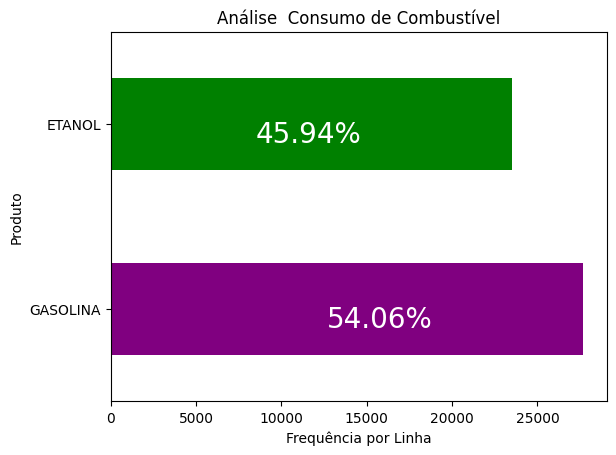

In [31]:
frequencia = df['Produto'].value_counts() # Absoluto
percentual = round(df['Produto'].value_counts(normalize =True)*100,2) # Percentual

proporcao = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual}) # Dataset -  Absoluto / Percentul
proporcao.rename_axis('Produto', axis = 'columns', inplace = True)

ax = proporcao['Frequência'].plot.barh(color=['purple', 'green'],rot=0);
for i, v in enumerate(proporcao['Porcentagem (%)']):
    ax.text(proporcao['Frequência'][i] + -15000, i - 0.10, f'{v:.2f}%', color='white',fontsize=20)




# Exibir o gráfico
plt.title('Análise  Consumo de Combustível')
plt.xlabel('Frequência por Linha')
plt.show()


###**Conclusão da Análise:**

**A gasolina continua sendo a preferência de mais de 54% dos consumidores brasileiros, mesmo com o etanol sendo, em média, 32% mais barato. Isso sugere que outros fatores, como a percepção de desempenho e a disponibilidade de postos de abastecimento, também podem influenciar na escolha do combustível.**



###**Pegunta Extra 02**

**Os dados dos conjuntos 'etanol' e 'gasolina' apresentam valores atípicos (outliers)? Se sim, verifiquem, se interferem na média do valor nacional?**

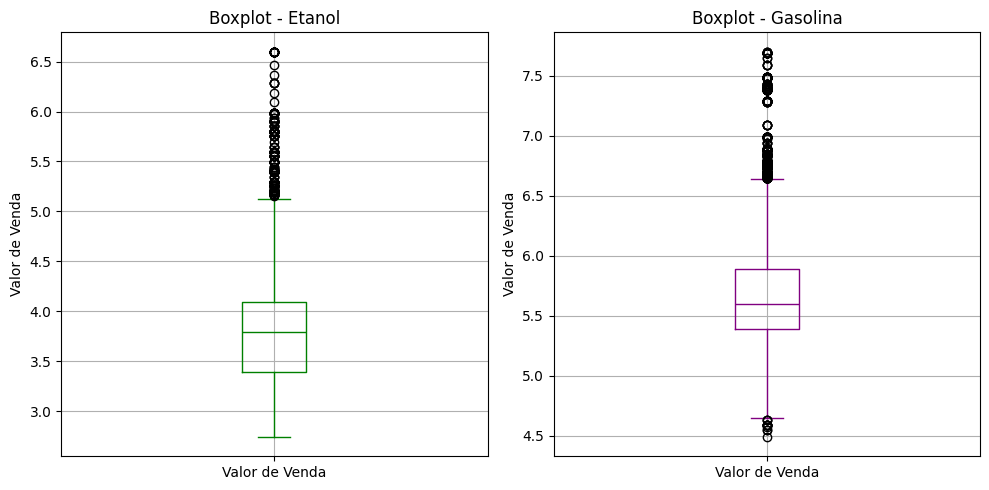

In [32]:
# Filtragem por combustível
etanol = (df.loc[df['Produto'] == 'ETANOL'])
gasolina = (df.loc[df['Produto'] == 'GASOLINA'])


# Criar dois subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot para o DataFrame 'etanol'
bp_etanol = etanol.boxplot(column=['Valor de Venda'], ax=axes[0], color = 'green')
axes[0].set_title('Boxplot - Etanol')
axes[0].set_ylabel('Valor de Venda')

# Boxplot para o DataFrame 'gasolina'
bp_gasolina = gasolina.boxplot(column=['Valor de Venda'], ax=axes[1], color = 'purple')
axes[1].set_title('Boxplot - Gasolina')
axes[1].set_ylabel('Valor de Venda')

# Ajustar layout
plt.tight_layout()


In [17]:
# Filtragem por combustível
etanol = (df.loc[df['Produto'] == 'ETANOL'])
gasolina = (df.loc[df['Produto'] == 'GASOLINA'])

# Média Com Outliers
md_etanol1 = round(etanol['Valor de Venda'].mean(),4)
md_gasolina1 = round(gasolina['Valor de Venda'].mean(),4)

lin1 = len(etanol)
lin_et = int(lin1)

lin2 = len(gasolina)
lin_ga = int(lin2)
# Sem Outlines

outlines_et = (etanol.loc[etanol['Valor de Venda'] > 5])
outlines_et = len(outlines_et)
outlines_ga = (gasolina.loc[gasolina['Valor de Venda'] > 6.5])
outlines_ga1 = len(outlines_ga)
outlines_ga = (gasolina.loc[gasolina['Valor de Venda'] < 4.8])
outlines_ga2 = len(outlines_ga)
outline_ga = outlines_ga1 + outlines_ga2
ga = round((outline_ga/lin_ga)*100,2)
et = round((outlines_et/lin_et)*100,2)

# Drop dos outliers
etanaldrop = etanol.drop(etanol[etanol['Valor de Venda'] > 5].index)
md_etanol0 = round(etanaldrop['Valor de Venda'].mean(),4)

gasolinadrop = gasolina.drop(gasolina[gasolina['Valor de Venda'] > 6.5].index)
gasolinadrop = gasolina.drop(gasolina[gasolina['Valor de Venda'] < 4.8].index)
md_gasolina0 = round(gasolinadrop['Valor de Venda'].mean(),4)

dic = {'Frequência':[lin_et,lin_ga],' Outliers':[outlines_et,outline_ga],'Percentual(%)':[et,ga],
       'Média C/ Outliers(R$)':[md_etanol1,md_gasolina1],'Média S/ Outliers(R$)':[md_etanol0,md_gasolina0]}
df_resultados = pd.DataFrame(dic, index=['Etanol','Gasolina'])
df_resultados


,Frequência,Outliers,Percentual(%),Média C/ Outliers(R$),Média S/ Outliers(R$)
Etanol,23514,339,1.44,3.8141,3.7890
Gasolina,27675,1107,4.00,5.6598,5.6682


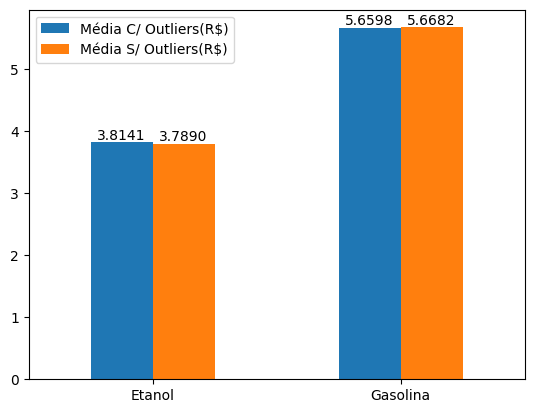

In [18]:
# Criar o gráfico de barras
ax = df_resultados.plot.bar(y=['Média C/ Outliers(R$)','Média S/ Outliers(R$)'], rot=0)

# Adicionar os valores acima das barras
for i, bar in enumerate(ax.patches):
    h = bar.get_height()
    w = bar.get_x() + bar.get_width() / 2
    ax.text(w, h, f'{h:.4f}', ha='center', va='bottom')

plt.show()

###**Conclusão da Análise:**

Para detectar outliers, inicialmente plotamos um gráfico de boxplot para cada combustível. Os gráficos mostraram outliers em ambos os combustíveis, mas com diferenças significativas.

No gráfico do etanol, os outliers, total de 339, estavam presentes apenas na parte superior. No gráfico da gasolina, os outliers, total de 1107, estavam presentes nas extremidades inferior e superior.

Removemos os outliers usando um código de filtragem.Como não tínhamos outros indicadores, como o total de litros consumidos, que poderiam nos ajudar a avaliar a precisão dos dados, concluímos que a redução no etanol após a remoção dos outliers foi insignificante, de menos de 0,006% para o etanol de aumento. O mesmo aconteceu com a gasolina, que apresentou uma redução de 0,001%.

Portanto, a remoção dos outliers não ipactam diretamente nos valores médios dos combustíveis.


In [19]:
df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Nome da Rua,Bairro,Produto,Data da Coleta,Valor de Venda,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,AVENIDA MUNIZ FALCÃO,JOSÉ MAIA COSTA,GASOLINA,01/11/2023,6.30,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,AVENIDA MUNIZ FALCÃO,JOSÉ MAIA COSTA,ETANOL,01/11/2023,4.88,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,AVENIDA VIEIRA DE BRITO,VILA MARIA,GASOLINA,01/11/2023,6.19,VIBRA
5,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,AVENIDA VIEIRA DE BRITO,VILA MARIA,ETANOL,01/11/2023,4.85,VIBRA
6,NE,AL,PALMEIRA DOS INDIOS,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,AVENIDA VIEIRA DE BRITO,SAO CRISTOVAO,GASOLINA,01/11/2023,6.22,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...
49447,NE,MA,SANTA INES,BARROS & CRUZ RODRIGUES LTDA,AVENIDA BRASIL,PARQUE SANTA CRUZ,ETANOL,29/12/2023,4.27,BRANCA
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,RUA XAVIER DA SILVA,CENTRO,GASOLINA,29/12/2023,5.79,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,RUA XAVIER DA SILVA,CENTRO,ETANOL,29/12/2023,3.79,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,AVENIDA JORGE DARIVA,CENTRO,GASOLINA,29/12/2023,5.49,RODOIL


###**Pergunta Extra 03**

Quais as 5 Bandeiras que tiveram os melhores resultados  em abastecimento no Município do Rio de Janeiro nos dois últimos meses?

In [20]:
# Filtragem pelo Estado do RJ
rj = (df.loc[df['Estado - Sigla'] == 'RJ'])

# Filtragem pelo Municípia do RJ
rj = (df.loc[df['Municipio'] == 'RIO DE JANEIRO'])


# As cinco melhores bandeiras
print('As 05 principais Bandeiras do Município do RJ:\n')
rj['Bandeira'].value_counts()[:5]


As 05 principais Bandeiras do Município do RJ:



Bandeira
BRANCA      280
VIBRA       200
IPIRANGA    175
RAIZEN      135
ALESAT       10
Name: count, dtype: int64

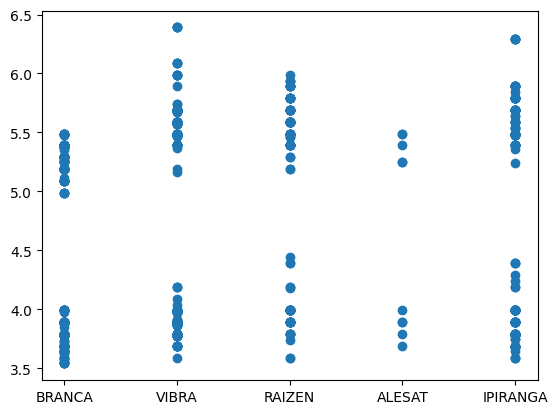

In [21]:
# Plote os pontos no gráfico
plt.scatter(rj['Bandeira'], rj['Valor de Venda'])

# Mostre o gráfico
plt.show()

###**Conclusão da Análise**

Após uma análise dos resultados obtidos por diferentes bandeiras, foi possível identificar quais foram as que se destacaram. As bandeiras com melhores resultados foram as seguintes:

1. Branca - 280 abastecimentos
2. Vibra - 200 abastecimentos
3. Ipiranga - 175 abastecimentos
4. Raizen - 135 abastecimentos
5. Alesat - 10 abastecimentos   



